In [1]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.integrate import trapezoid as trap
import matplotlib.pyplot as plt
from peakutils import indexes
import pencil as pc
from IPython.display import display, Latex
import modes

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
plt.rcParams.update({'font.size': 11})
plt.rcParams['text.usetex'] = True

In [3]:
sim = pc.get_sim(quiet=True)
ts = pc.read.ts()

Read 39956 lines.


In [4]:
# #for exp fitting
# def f(t, a, b):
#     return a*np.exp(t*b)

# i1 = np.argmin(abs(ts.t-600))
# j1 = np.argmin(abs(ts.t-1800))

# t_exp = ts.t[i1:j1]
# b_exp = ts.brms[i1:j1]

# popt1, pcov2 = curve_fit(f, t_exp, b_exp, [0,0.0016])

# t_fit1 = ts.t[i1-100:j1+130]
# b_fit1 = f(t_fit1, popt1[0], popt1[1])
# grow=round(popt1[1],3)
# grow

In [5]:
# #for st_li2ne fi2tti2ng
# def g(t, a, b):
#     return a*t+b

# i2 = np.argmin(abs(ts.t-4500))
# j2 = np.argmin(abs(ts.t-7000))

# t_lin = ts.t[i2:j2]
# b_lin = ts.brms[i2:j2]

# popt2, pcov2 = curve_fit(g, t_lin, b_lin)

# t_fit2 = ts.t[i2-300:j2+100]
# b_fit2 = g(t_fit2, popt2[0], popt2[1])
# b = round(np.average(b_fit2),3)
# b

In [6]:

#for exp fitting
def f(t, a, b):
    return a*np.exp(t*b)

i1 = np.argmin(abs(ts.t-600))
j1 = np.argmin(abs(ts.t-1800))

t_exp = ts.t[i1:j1]
b_exp = ts.brms[i1:j1]

popt1, pcov2 = curve_fit(f, t_exp, b_exp, [0,0.0016])

t_fit1 = ts.t[i1-100:j1+100]
b_fit1 = f(t_fit1, popt1[0], popt1[1])
grow=round(popt1[1],3)
print('grow factor is', grow)

#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-4500))
j2 = np.argmin(abs(ts.t-7000))

t_lin = ts.t[i2:j2]
b_lin = ts.brms[i2:j2]

popt2, pcov2 = curve_fit(g, t_lin, b_lin)

t_fit2 = ts.t[i2-300:j2+100]
b_fit2 = g(t_fit2, popt2[0], popt2[1])
b_ave = round(np.average(b_fit2),3)
print(r'$\langle B_{rms}\rangle$=', b_ave)

#for urms
i3 = np.argmin(abs(ts.t-4500))
j3 = np.argmin(abs(ts.t-7000))

t_lin = ts.t[i3:j3]
u_lin = ts.urms[i3:j3]

popt2, pcov2 = curve_fit(g, t_lin, u_lin)

t_fit3 = ts.t[i3-300:j3+100]
u_fit3 = g(t_fit3, popt2[0], popt2[1])
u_ave = round(np.average(u_fit3),3)
print(r'$\langle u_{rms}\rangle$=', u_ave)

grow factor is 0.005
$\langle B_{rms}\rangle$= 1.1
$\langle u_{rms}\rangle$= 0.106


In [7]:
import matplotlib

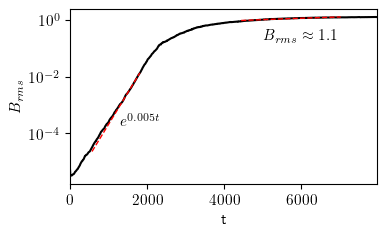

In [9]:
# matplotlib.rcParams['axes.edgecolor'] = '#ff0000'
# plt.style.use('dark_background')
fig, ax = plt.subplots(1,1, figsize=(4,2.5))

# ax.xaxis.label.set_color('yellow')        #setting up X-axis label color to yellow
# ax.yaxis.label.set_color('blue')          #setting up Y-axis label color to blue

# ax.tick_params(axis='x', colors='red')    #setting up X-axis tick color to red
# ax.tick_params(axis='y', colors='black')  #setting up Y-axis tick color to black

# ax.spines['left'].set_color('red')        # setting up Y-axis tick color to red
# ax.spines['top'].set_color('red')

ax.semilogy(ts.t, ts.brms, c='k')
ax.plot(t_fit2, b_fit2, linewidth=1.0, linestyle = '--', color='r')
ax.plot(t_fit1, b_fit1, linewidth=1.0, linestyle = '--', color='r')
# plt.axvline(x=yaver.t[indx_sat_d], c='k', ls=':')
# plt.axvline(x=tt[kin_t_d])
# plt.axvline(x=tt[kin_t_u])
# plt.axhline(y=ts.brms[0], c='k', ls='--')
# plt.axhline(y=ts.brms[-1])
#plt.plot(t_fit, u_fit, '--r')
ax.set_yscale('log')
ax.set_xlim(0,ts.t[-1])
plt.text(5000,0.2, fr"$B_{{rms}}\approx{b_ave}$", fontsize=11)
plt.text(1300,0.0002, fr"$e^{{{grow}t}}$", fontsize=11)
# plt.annotate("exponential growth", xy=(760, 0.0003), xytext=(700, 0.00002), arrowprops=dict(arrowstyle="->"))
# plt.annotate("saturation", xy=(2100, 0.35), xytext=(2100, 0.02), arrowprops=dict(arrowstyle="->"))
ax.set_xlabel("t")
ax.set_ylabel(r"$B_{rms}$")
plt.tight_layout()
plt.savefig('plots/dynamo_ppt.png', dpi=150)
plt.show()